# Homework 6-2
## Abby Baskind
## 12 October 2023

hi gabby

In [1]:
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import xarray as xr
import pandas as pd
import scipy
from datetime import datetime, timedelta
import time
import seaborn
import matplotlib.dates as mdates
import bottleneck as bn
import PyCO2SYS as pyco2
import gsw
import math
import netCDF4 as nc
import requests

# Import K's code for calculating the coefficients of the carb system
import calc_coeffs as co2
import H_poly as hpoly
import H_poly2 as hpoly2
from importlib import reload
import warnings
# warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

# 2.	Check the result with the following and printscreen the output:
at T = 20 (°C), S = 34.5 (‰), AT = 2350 ×10-6 eq kg-1, DIC = 2081.608 × 10-6 mol kg-1
it is expected to result in pCO2 = 380 ×10-6 atm.


In [3]:
import carbon as carbon

results = carbon.pHsolver(temperature = 20, salinity = 34.5, TA = 2350, DIC = 2081.608)
print(results)
print('Expected pCO2 = 380 uatm.\nActual pCO2 = ' + str(np.round(results['pCO2'],3)) + ' uatm')

{'[H+]': 0.008628844503867472, 'pH': 8.06404735714605, '[HCO3]': 1871.5754096728665, '[CO3]': 197.68448074518065, '[CO2*]': 12.34810958195277, 'pCO2': 379.9977995675128, 'DIC': 2081.608, 'TA': 2350.0, 'k0': 0.03249521338283152}
Expected pCO2 = 380 uatm.
Actual pCO2 = 379.998 uatm


# 3.	Graph the variation of pCO2 with T, S and AT for fixed DIC of 2100 mol kg-1
##  Make plots of pCO2 for 0 < T < 35 (°C)


Text(0.5, 1.0, 'S = 34.5 PSU\nDIC = 2100 umol/kg\nTA = 2350 umol/kg')

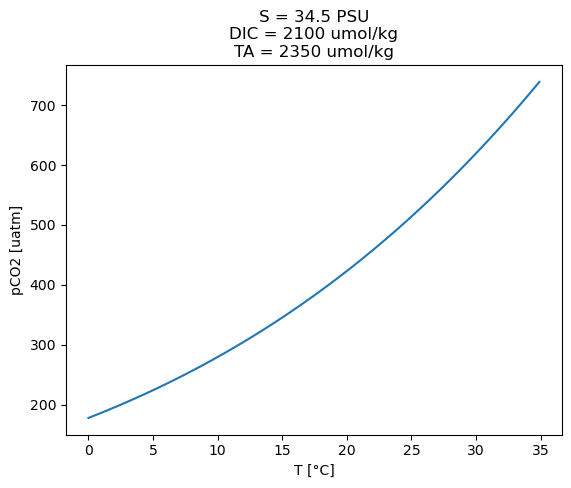

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import carbon as carbon
T = np.arange(0,35,0.1)
TA = np.zeros(T.size)
TA[:] = 2350
S = np.zeros(TA.size)
S[:] = 35
DIC = np.zeros(TA.size)
DIC[:] = 2100

results = carbon.pHsolver(TA = TA, temperature = T, salinity = S, DIC = DIC)
pCO2 = results['pCO2']

fig, ax = plt.subplots()
ax.plot(T, pCO2)
ax.set_xlabel('T [°C]')
ax.set_ylabel('pCO2 [uatm]')
ax.set_title('S = 34.5 PSU\nDIC = 2100 umol/kg\nTA = 2350 umol/kg')

Text(0.5, 1.0, 'S = 34.5 PSU\nDIC = 2100 umol/kg\nTA = 2350 umol/kg')

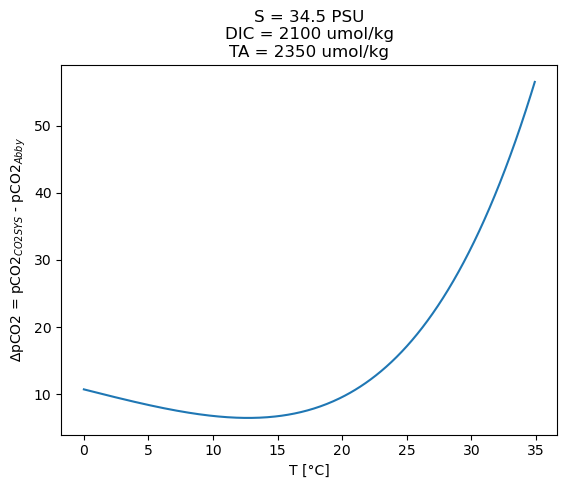

In [5]:
import PyCO2SYS as pyco2
T = np.arange(0,35,0.1)
TA = np.zeros(T.size)
TA[:] = 2350
S = np.zeros(TA.size)
S[:] = 35
DIC = np.zeros(TA.size)
DIC[:] = 2100

results2 = pyco2.sys(par1 = TA, par2 = DIC, par1_type = 1, par2_type = 2, temperature = T, salinity = S)
pCO2_ = results2['pCO2']

fig, ax = plt.subplots()
ax.plot(T, pCO2_ - pCO2)
ax.set_xlabel('T [°C]')
ax.set_ylabel('∆pCO2 = pCO2$_{CO2SYS}$ - pCO2$_{Abby}$')
ax.set_title('S = 34.5 PSU\nDIC = 2100 umol/kg\nTA = 2350 umol/kg')

In [15]:
results['pH']- results2['pH']

array([-0.02754186, -0.02733226, -0.02712356, -0.02691578, -0.02670891,
       -0.02650294, -0.02629788, -0.02609372, -0.02589047, -0.02568811,
       -0.02548666, -0.02528611, -0.02508646, -0.02488771, -0.02468985,
       -0.02449289, -0.02429682, -0.02410165, -0.02390737, -0.02371398,
       -0.02352149, -0.02332988, -0.02313916, -0.02294932, -0.02276038,
       -0.02257231, -0.02238514, -0.02219884, -0.02201343, -0.02182889,
       -0.02164524, -0.02146247, -0.02128057, -0.02109955, -0.0209194 ,
       -0.02074013, -0.02056173, -0.02038421, -0.02020755, -0.02003177,
       -0.01985685, -0.0196828 , -0.01950962, -0.01933731, -0.01916586,
       -0.01899527, -0.01882554, -0.01865668, -0.01848867, -0.01832153,
       -0.01815524, -0.01798981, -0.01782524, -0.01766152, -0.01749866,
       -0.01733665, -0.01717548, -0.01701517, -0.01685571, -0.0166971 ,
       -0.01653934, -0.01638242, -0.01622634, -0.01607112, -0.01591673,
       -0.01576318, -0.01561048, -0.01545862, -0.01530759, -0.01

When comparing the results of my function to `PyCO2SYS`, my results underestimate pCO2. This underestimation increases with temperature. Could this be an artifact of the iterative solution for [H+]? Given that the solved pH from my function and `PyCO2SYS` are different, this seems likely.

## 30 < S < 40 (‰)

Text(0.5, 1.0, 'T = 20°C\nDIC = 2100 umol/kg\nTA = 2350 umol/kg')

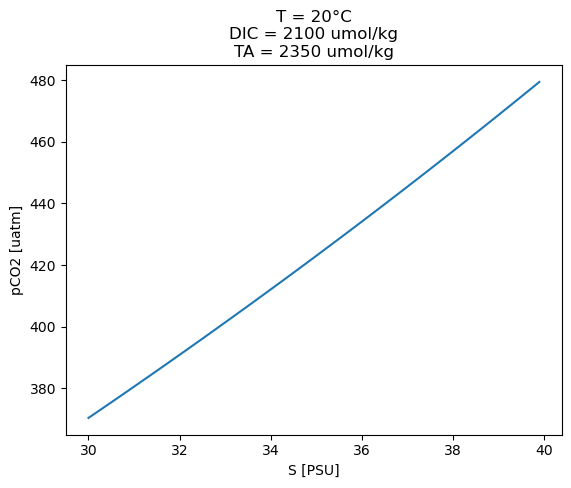

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import carbon as carbon
S = np.arange(30,40,0.1)
TA = np.zeros(S.size)
TA[:] = 2350
T = np.zeros(S.size)
T[:] = 20
DIC = np.zeros(S.size)
DIC[:] = 2100

results = carbon.pHsolver(TA = TA, temperature = T, salinity = S, DIC = DIC)
pCO2 = results['pCO2']

fig, ax = plt.subplots()
ax.plot(S, pCO2)
ax.set_xlabel('S [PSU]')
ax.set_ylabel('pCO2 [uatm]')
ax.set_title('T = 20°C\nDIC = 2100 umol/kg\nTA = 2350 umol/kg')

Text(0.5, 1.0, 'T = 34.5 PSU\nDIC = 2100 umol/kg\nTA = 2350 umol/kg')

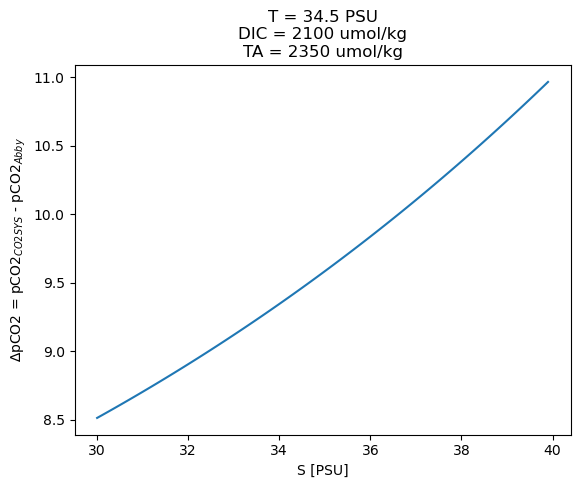

In [17]:
import PyCO2SYS as pyco2
S = np.arange(30,40,0.1)
TA = np.zeros(S.size)
TA[:] = 2350
T = np.zeros(S.size)
T[:] = 20
DIC = np.zeros(S.size)
DIC[:] = 2100

results2 = pyco2.sys(par1 = TA, par2 = DIC, par1_type = 1, par2_type = 2, temperature = T, salinity = S)
pCO2_ = results2['pCO2']

fig, ax = plt.subplots()
ax.plot(S, pCO2_ - pCO2)
ax.set_xlabel('S [PSU]')
ax.set_ylabel('∆pCO2 = pCO2$_{CO2SYS}$ - pCO2$_{Abby}$')
ax.set_title('T = 34.5 PSU\nDIC = 2100 umol/kg\nTA = 2350 umol/kg')

Compared to `PyCO2SYS`, my function understimates pCO2, especially with increasing salinity.

## 1800 < AT < 2800

Text(0.5, 1.0, 'T = 20°C\nDIC = 2100 umol/kg\nS = 34.5 PSU')

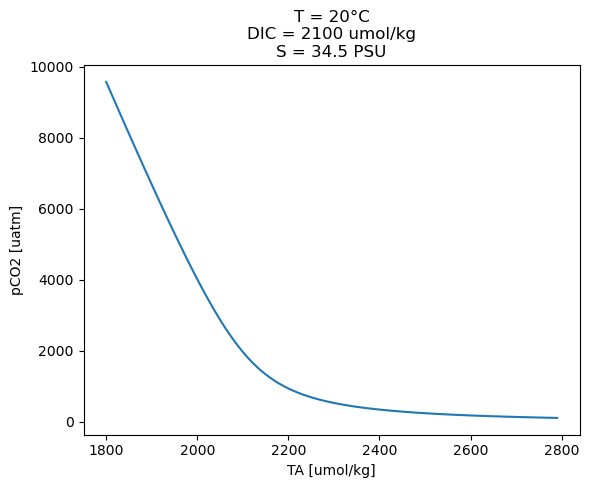

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import carbon as carbon
TA = np.arange(1800,2800,10)
T = np.zeros(TA.size)
T[:] = 20
S = np.zeros(TA.size)
S[:] = 34.5
DIC = np.zeros(S.size)
DIC[:] = 2100

results = carbon.pHsolver(TA = TA, temperature = T, salinity = S, DIC = DIC)
pCO2 = results['pCO2']

fig, ax = plt.subplots()
ax.plot(TA, pCO2)
ax.set_xlabel('TA [umol/kg]')
ax.set_ylabel('pCO2 [uatm]')
ax.set_title('T = 20°C\nDIC = 2100 umol/kg\nS = 34.5 PSU')

Text(0.5, 1.0, 'T = 20°C\nDIC = 2100 umol/kg\nS = 34.5 PSU')

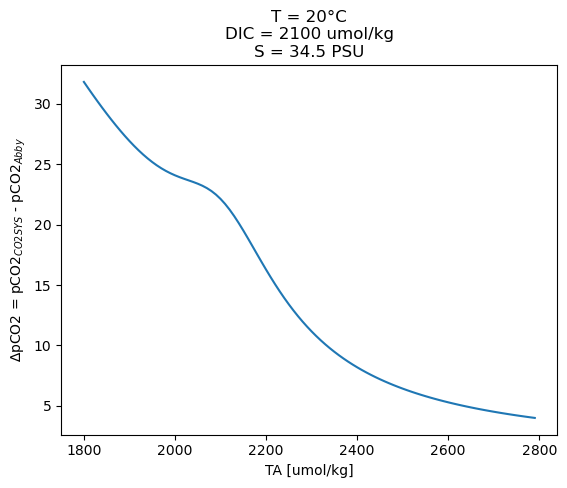

In [20]:
TA = np.arange(1800,2800,10)
T = np.zeros(TA.size)
T[:] = 20
S = np.zeros(TA.size)
S[:] = 34.5
DIC = np.zeros(S.size)
DIC[:] = 2100

results2 = pyco2.sys(par1 = TA, par2 = DIC, par1_type = 1, par2_type = 2, temperature = T, salinity = S)
pCO2_ = results2['pCO2']

fig, ax = plt.subplots()
ax.plot(TA, pCO2_ - pCO2)
ax.set_xlabel('TA [umol/kg]')
ax.set_ylabel('∆pCO2 = pCO2$_{CO2SYS}$ - pCO2$_{Abby}$')
ax.set_title('T = 20°C\nDIC = 2100 umol/kg\nS = 34.5 PSU')

Compared to `PyCO2SYS`, my function underestimates pCO2, especially with decreasing TA. 